# Comparing Rates of Convergence

In [1]:
import numpy as np
import matplotlib.pyplot as plt

###### Remarks on Machine Zero

In [2]:
np.finfo(float).eps

2.220446049250313e-16

In [3]:
print('1+eps = {:1.15f}'.format(1+np.finfo(float).eps))

1+eps = 1.000000000000000


In [4]:
3/10 == 1/10+1/10+1/10

False

In [5]:
print(1/10+1/10+1/10)
print(3/10)

0.30000000000000004
0.3


In [6]:
np.fabs((1/10+1/10+1/10)-3/10) < np.finfo(float).eps

True

### Log Plots of the Error

###### What is a log-plot? Observe what happens when we plot the $\log(y)$ versus $x$ where $y = [1, 0.1, 0.01, 0.001, 0.0001, ...]$. Notice that the command semilogy identifies the tick marks as powers of $10$.

[1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05]
[ 0. -1. -2. -3. -4. -5.]


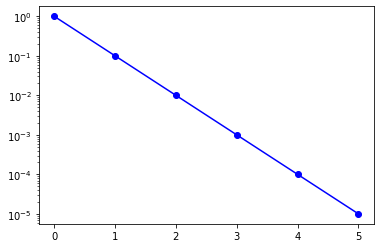

In [7]:
error_vector = 1/10**np.arange(0,6);
print(error_vector)           # print out the error
print(np.log10(error_vector)) # produces the exponents of the error
plt.semilogy(error_vector,'bo-');

###### Here is the plot of $\log(y)$ without semilogy's tick marks. Notice that the error decreases linearly.

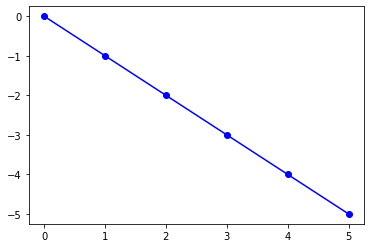

In [8]:
plt.plot(np.log10(error_vector),'bo-'); # The y-axis contains the exponents

###### Now we compare the linearly decreasing error terms with error terms that decrease quadratically (the power of each error term increase by a factor of 2), i.e. $[0.1, 0.01, 0.001]$ is linear but $[0.01, 0.0001, 0.000001]$ is quadratic. Look below to see linear versus quadratic decrease in the error.

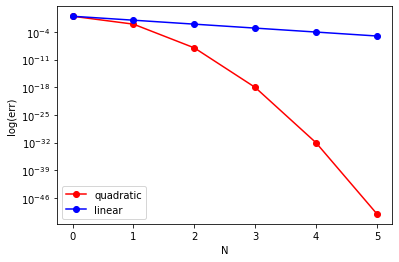

In [9]:
quad_error_vector = [error_vector[k]**(2*k) for k in range(0,len(error_vector))]
plt.semilogy(quad_error_vector,'ro-')+plt.semilogy(error_vector,'bo-')
plt.xlabel('N')
plt.ylabel('log(err)')
plt.legend(['quadratic','linear']);

### Compare the convergence rates of the bisection method versus Newton's method

###### In the following two functions, bisect and newton, we add two lines that will store a list of the error terms. We then follow-up with a semilogy plot of the error versus the number of iterations.

In [19]:
def f(x):
    #return x**2-2
    return (x-1.33)**5

def fp(x):
    #return 2*x
    return 5*(x-1.33)**4

In [20]:
# copy & paste your newton algorithm into this cell
x = 9
error = 1
nits, MAXITS = 1, 10
tol = np.finfo(float).eps
# Before the while loop, place the following code
evn = []
while error > tol and nits < MAXITS:
    xold = x
    eta = f(x)/fp(x)
    x -= 5*eta
    error = np.fabs(eta)#np.fabs(f(x))
    # Inside the while loop, just after computing the error, insert the following code
    evn.append(error)
    nits += 1
MAXITS = nits
# Remember to properly indent!!!!
print(x)

1.33


In [23]:
# copy & paste your bisection algorithm into this cell
 # ******************************************************************************
# Implement the bisection algorithm for locating the root of a function
#
# Arguments:
# a = left endpoint
# b = right endpoint (assuming an intelligent user so we will not test if b > a)
# MAXITS = maximum number of iterations before stopping, default = 100
# tol = tolerance, when is error < tol? default = 1e-8
# ******************************************************************************
    
# Prime the algorithm with an estimate of the root
# Assume and intelligent use who inputs b > a
a, b = 1, 3
error = (b - a)/2
c = a + error # Safe method for computing average
nits = 1 # Count this iteration

# Before the while loop, place the following code
evb = []
# Start the while loop
while np.fabs(error) > tol and nits < MAXITS:
    # Check the conditions using the intermediate value theorem, remember to use np.sign
    # Redifine the interval, is a = c or is b = c?
    # Assign the new c
    if np.sign(f(a))*np.sign(f(b)) > 0:
        print('Root not bracketed.')
        break
    elif np.sign(f(a))*np.sign(f(c)) < 0:
        b = c
        error = (b-a)/2# Use the same error that you chose from above
        c = a + error
        nits += 1
    elif np.sign(f(b))*np.sign(f(c)) < 0:
        a = c
        error = (b-a)/2# Use the same error that you chose from above
        c = a + error
        nits += 1
    else:
        error = np.finfo(float).eps
    # Inside the while loop, just after computing the error, insert the following code
    evb.append(error)
# Remember to properly indent!!!!
print(c)

1.25


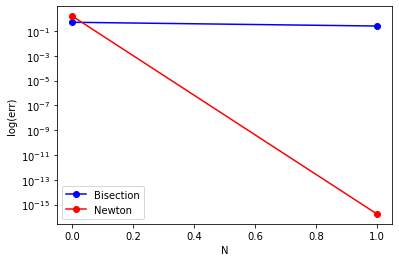

In [24]:
# Plot the convergence results
plt.semilogy(np.arange(len(evb)),np.array(evb),'bo-')
plt.semilogy(np.arange(len(evn)),np.array(evn),'ro-')
plt.xlabel('N')
plt.ylabel('log(err)')
plt.legend(['Bisection','Newton']);

###### Exercise 1: Estimating the $\sqrt{2}$ using $f(x) = x^2-2$ yields the following convergence results.
* Run the code above to produce the log-error plots
* Use a tolerance of machine-zero for all exercises

###### Exercise 2: Now let us explore what happens when we try to find the root of $f(x) = \left(\sin(x)\right)^5$ using Newton's method -- notice the repeated root $x^\ast=0$.
* Repeat Exercise 1 but replace $f(x) = x^2 - 2$ and so on, with this new function
* Change the bisection interval to a = -2, b = 1
* When making the call to newton's method input a MAXITS of 100

######  <font color = 'red'>Takeaways:
* <font color = 'red'>Bisection method is linearly convergent
* <font color = 'red'>Newton's method, under the right conditions, is quadratically convergent
* <font color = 'red'>We know these results analytically and by observing the log-error plot
* <font color = 'red'>Repeated roots cause Newton's method to become linearly convergent (why?)
* <font color = 'red'>If a root is repeated, quadratic convergence for Newton's method can be recovered by modifying the algorithm

In [14]:
[]

[]